# EDA

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data/dados_finais.xlsx')
df.head(5)

n_reuniao       data                                              texto  \
0         21 1998-01-28  Em uma reunião do Comitê de Política Monetária...   
1         22 1998-03-04  O Comitê de Política Monetária (COPOM) da Repú...   
2         23 1998-04-15  O Comitê de Política Monetária (COPOM) decidiu...   
3         24 1998-05-20  O Comitê Monetário Nacional (COPOM) discute a ...   
4         25 1998-06-24  O Comitê de Política Monetária (COPOM) discuti...   

    sentimento   ano  trimestre  mes governo  selic_mes_seguinte  \
0  Preocupação  1998          1    1     FHC            0.117483   
1    Confiança  1998          1    3     FHC            0.097163   
2      Cautela  1998          2    4     FHC            0.083271   
3    Confiança  1998          2    5     FHC            0.076660   
4      Cautela  1998          2    6     FHC            0.074133   

   ano_eleitoral  ...  cdi_mes_seguinte  cdi_mes_anterior  ipca_mes_anterior  \
0              0  ...          0.116246          0.127065               0.57   
1              0  ...          0.096459          0.114755               0.40   
2              0  ...          0.082706          0.095585               0.29   
3              0  ...          0.076624          0.082524               0.37   
4              0  ...          0.073619          0.076204               0.26   

   ipca_mes_seguinte  desemprego_mes_anterior  desemprego_mes_seguinte  \
0              0.585                      0.0                      0.0   
1              0.290                      0.0                      0.0   
2              0.370                      0.0                      0.0   
3              0.260                      0.0                      0.0   
4             -0.050                      0.0                      0.0   

   ibovespa_mes_anterior  ibovespa_mes_seguinte  pandemia  bc_autonomo  
0            9694.095238           10204.727273         0            0  
1           10389.300000           11613.478261         0            0  
2           11908.142857           11422.809524         0            0  
3           11158.857143            9913.454545         0            0  
4            9845.227273           10305.227273         0            0  

[5 rows x 23 columns]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   n_reuniao                   250 non-null    int64         
 1   data                        250 non-null    datetime64[ns]
 2   texto                       250 non-null    object        
 3   sentimento                  250 non-null    object        
 4   ano                         250 non-null    int64         
 5   trimestre                   250 non-null    int64         
 6   mes                         250 non-null    int64         
 7   governo                     250 non-null    object        
 8   selic_mes_seguinte          250 non-null    float64       
 9   ano_eleitoral               250 non-null    int64         
 10  selic_mes_anterior          250 non-null    float64       
 11  cotacao_dolar_mes_anterior  250 non-null    float64       

## Resumo estatístico para colunas numéricas

In [67]:
df.describe()

n_reuniao                        data          ano  trimestre  \
count  250.000000                         250   250.000000  250.00000   
mean   145.500000  2010-07-08 20:44:09.600000  2010.016000    2.50400   
min     21.000000         1998-01-28 00:00:00  1998.000000    1.00000   
25%     83.250000         2003-04-30 00:00:00  2003.000000    2.00000   
50%    145.500000         2009-09-26 12:00:00  2009.000000    2.50000   
75%    207.750000         2017-07-12 00:00:00  2017.000000    3.75000   
max    270.000000         2025-05-07 00:00:00  2025.000000    4.00000   
std     72.312977                         NaN     8.084378    1.12027   

              mes  selic_mes_seguinte  ano_eleitoral  selic_mes_anterior  \
count  250.000000          250.000000     250.000000          250.000000   
mean     6.520000            0.052074       0.212000            0.052124   
min      1.000000            0.007469       0.000000            0.007469   
25%      4.000000            0.039211       0.000000            0.039270   
50%      6.500000            0.050743       0.000000            0.050788   
75%      9.750000            0.066749       0.000000            0.066735   
max     12.000000            0.144515       1.000000            0.139918   
std      3.427036            0.023253       0.409545            0.023253   

       cotacao_dolar_mes_anterior  cotacao_dolar_mes_seguinte  \
count                  250.000000                  250.000000   
mean                     2.928414                    2.942947   
min                      1.119109                    1.126552   
25%                      1.952099                    1.933916   
50%                      2.466117                    2.483036   
75%                      3.646158                    3.714993   
max                      6.051495                    6.123352   
std                      1.273747                    1.278337   

       cdi_mes_seguinte  cdi_mes_anterior  ipca_mes_anterior  \
count        250.000000        250.000000         250.000000   
mean           0.051832          0.051862           0.501860   
min            0.007469          0.007469          -0.520000   
25%            0.038842          0.038853           0.270000   
50%            0.050629          0.050711           0.462500   
75%            0.066594          0.066456           0.680000   
max            0.142373          0.137795           2.560000   
std            0.023068          0.023034           0.377244   

       ipca_mes_seguinte  desemprego_mes_anterior  desemprego_mes_seguinte  \
count         250.000000               250.000000               250.000000   
mean            0.519100                 7.828000                 7.822280   
min            -0.325000                 0.000000                 0.000000   
25%             0.270000                 6.400000                 6.325000   
50%             0.490000                 8.400000                 8.400000   
75%             0.683750                11.600000                11.575000   
max             2.560000                14.900000                14.900000   
std             0.382862                 4.501844                 4.491678   

       ibovespa_mes_anterior  ibovespa_mes_seguinte    pandemia  bc_autonomo  
count             250.000000             250.000000  250.000000   250.000000  
mean            52662.386006           53017.297602    0.092000     0.140000  
min              6335.363636            6346.500000    0.000000     0.000000  
25%             17043.217391           17018.681324    0.000000     0.000000  
50%             51193.022727           50646.751976    0.000000     0.000000  
75%             69974.352273           70699.055195    0.000000     0.000000  
max            135441.478261          137970.111111    1.000000     1.000000  
std             36888.263260           37048.704672    0.289606     0.347683

## Verificando valores faltantes

In [68]:
df.isnull().sum()

n_reuniao                     0
data                          0
texto                         0
sentimento                    0
ano                           0
trimestre                     0
mes                           0
governo                       0
selic_mes_seguinte            0
ano_eleitoral                 0
selic_mes_anterior            0
cotacao_dolar_mes_anterior    0
cotacao_dolar_mes_seguinte    0
cdi_mes_seguinte              0
cdi_mes_anterior              0
ipca_mes_anterior             0
ipca_mes_seguinte             0
desemprego_mes_anterior       0
desemprego_mes_seguinte       0
ibovespa_mes_anterior         0
ibovespa_mes_seguinte         0
pandemia                      0
bc_autonomo                   0
dtype: int64

## Convertendo Taxa Selic Diária em Mensal

In [69]:
df['selic_mes_seguinte_am'] = df['selic_mes_seguinte'].apply(lambda x: ((1+(x/100))**252)-1)
df['selic_mes_seguinte_am']

0      0.344314
1      0.277279
2      0.233377
3      0.213014
4      0.205320
         ...   
245    0.111260
246    0.121021
247    0.131062
248    0.141044
249    0.146282
Name: selic_mes_seguinte_am, Length: 250, dtype: float64

In [70]:
df['selic_mes_anterior_am'] = df['selic_mes_anterior'].apply(lambda x: ((1+(x/100))**252)-1)
df['selic_mes_anterior_am']

0      0.379291
1      0.341375
2      0.273951
3      0.231336
4      0.211953
         ...   
245    0.106501
246    0.111499
247    0.121500
248    0.131499
249    0.141500
Name: selic_mes_anterior_am, Length: 250, dtype: float64

## Convertendo CDI Diário em Mensal

In [71]:
df['cdi_mes_seguinte_am'] = df['cdi_mes_seguinte'].apply(lambda x: ((1+(x/100))**252)-1)
df['cdi_mes_seguinte_am']

0      0.340134
1      0.275017
2      0.231623
3      0.212905
4      0.203761
         ...   
245    0.111260
246    0.121021
247    0.131062
248    0.141044
249    0.146282
Name: cdi_mes_seguinte_am, Length: 250, dtype: float64

In [72]:
df['cdi_mes_anterior_am'] = df['cdi_mes_anterior'].apply(lambda x: ((1+(x/100))**252)-1)
df['cdi_mes_anterior_am']

0      0.377129
1      0.335116
2      0.272215
3      0.231059
4      0.211624
         ...   
245    0.106501
246    0.111499
247    0.121500
248    0.131499
249    0.141500
Name: cdi_mes_anterior_am, Length: 250, dtype: float64

## Histograma

In [73]:
df.columns

Index(['n_reuniao', 'data', 'texto', 'sentimento', 'ano', 'trimestre', 'mes',
       'governo', 'selic_mes_seguinte', 'ano_eleitoral', 'selic_mes_anterior',
       'cotacao_dolar_mes_anterior', 'cotacao_dolar_mes_seguinte',
       'cdi_mes_seguinte', 'cdi_mes_anterior', 'ipca_mes_anterior',
       'ipca_mes_seguinte', 'desemprego_mes_anterior',
       'desemprego_mes_seguinte', 'ibovespa_mes_anterior',
       'ibovespa_mes_seguinte', 'pandemia', 'bc_autonomo',
       'selic_mes_seguinte_am', 'selic_mes_anterior_am', 'cdi_mes_seguinte_am',
       'cdi_mes_anterior_am'],
      dtype='object')

In [74]:
colunas_histograma = ['ano', 'mes', 'selic_mes_seguinte_am', 'selic_mes_anterior_am', 'cotacao_dolar_mes_anterior', 'cotacao_dolar_mes_seguinte', 'cdi_mes_anterior_am', 'cdi_mes_seguinte_am', 'ipca_mes_anterior', 'ipca_mes_seguinte', 'desemprego_mes_anterior', 'desemprego_mes_seguinte', 'ibovespa_mes_anterior', 'ibovespa_mes_seguinte']

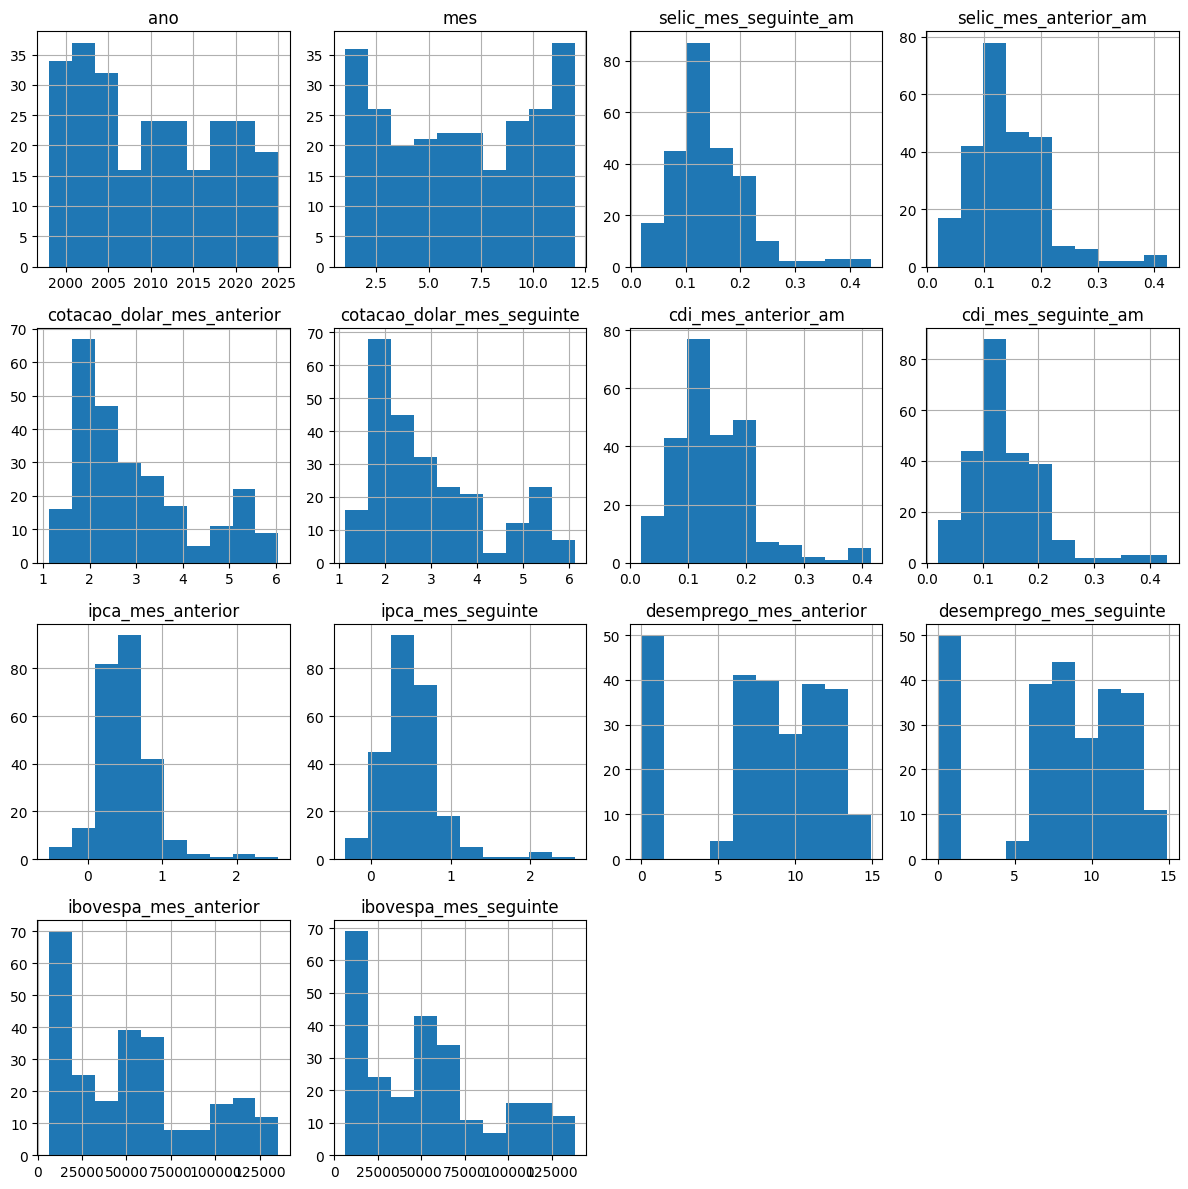

In [75]:
df[colunas_histograma].hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

## Verificando Outliers

In [76]:
colunas_numericas = colunas_histograma
colunas_numericas.remove('ano')
colunas_numericas.remove('mes')

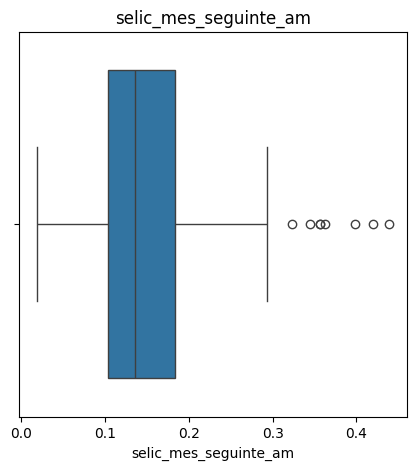

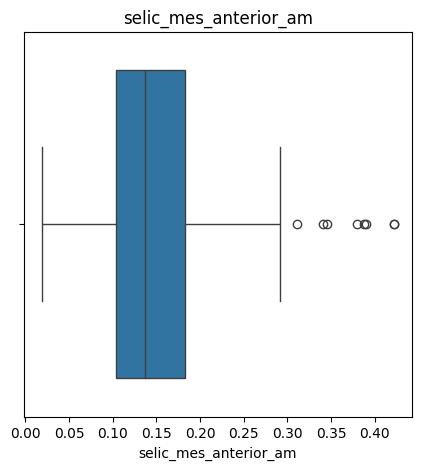

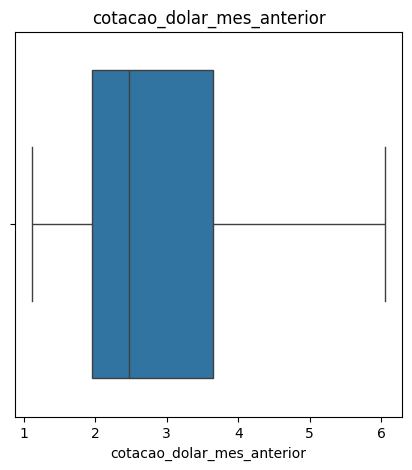

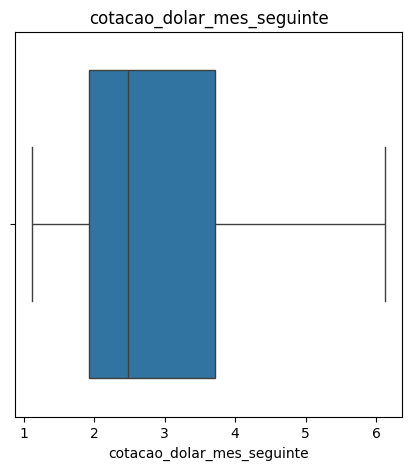

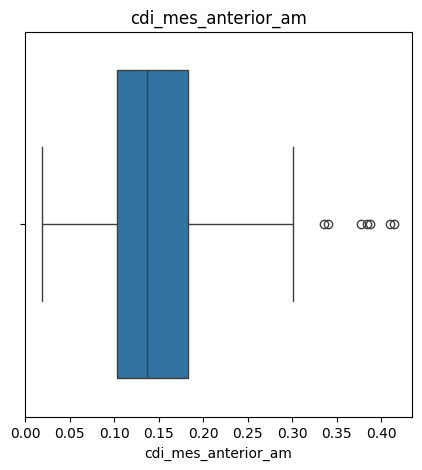

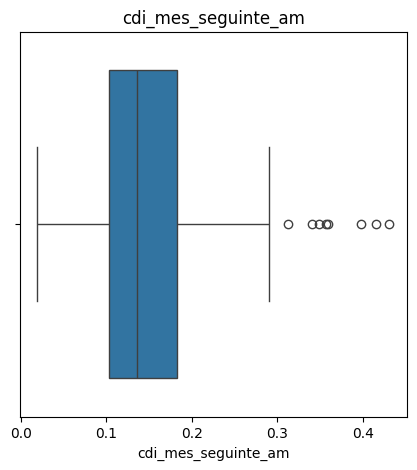

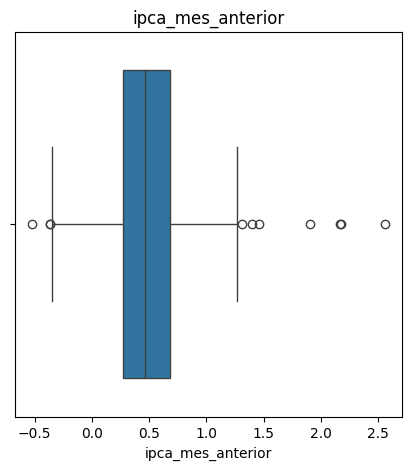

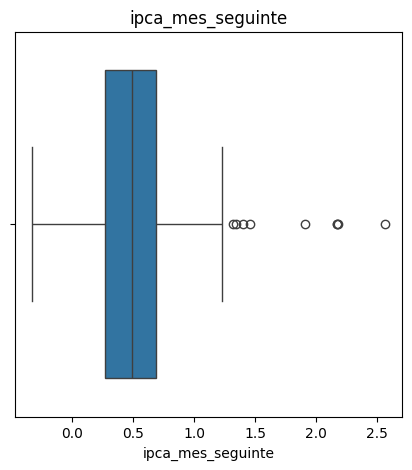

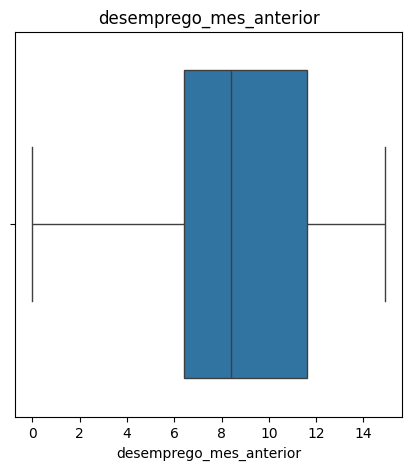

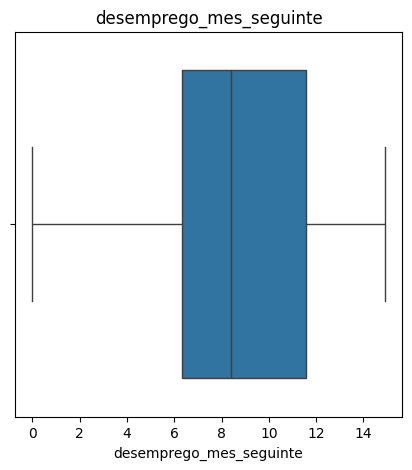

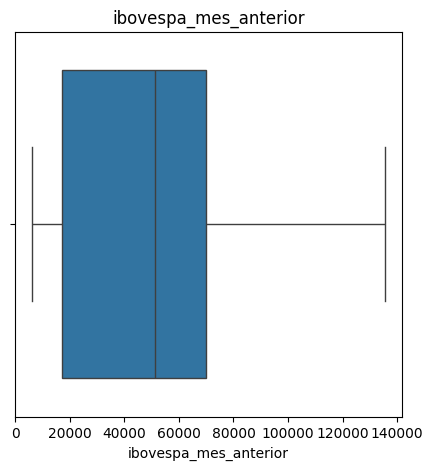

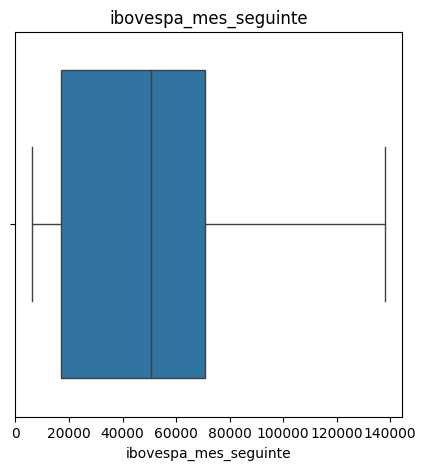

In [77]:
for column in df[colunas_numericas].select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

## Séries Temporais

### Selic

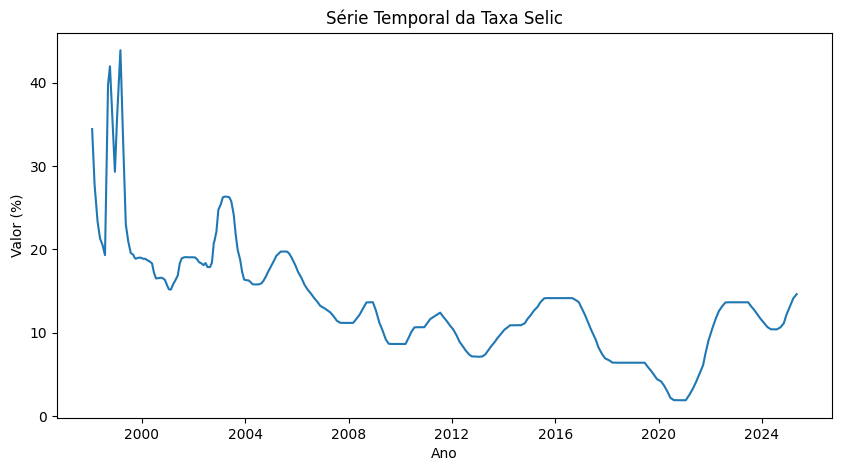

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['selic_mes_seguinte_am']*100)
plt.title('Série Temporal da Taxa Selic')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### CDI

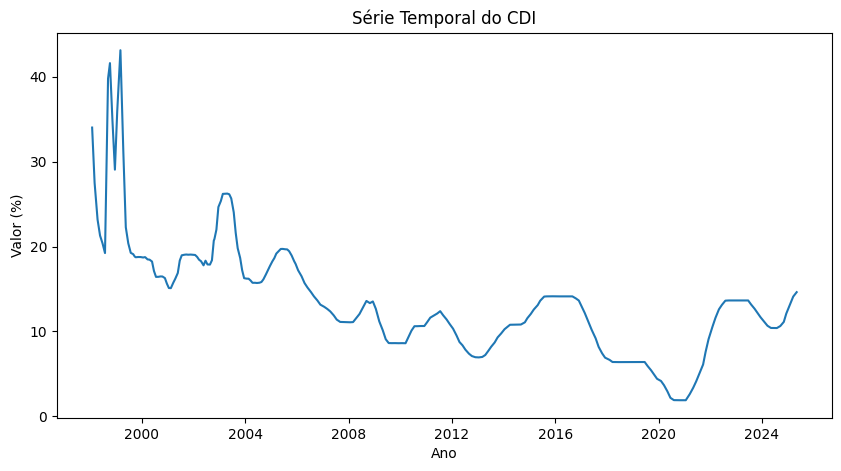

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['cdi_mes_seguinte_am']*100)
plt.title('Série Temporal do CDI')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### Dólar

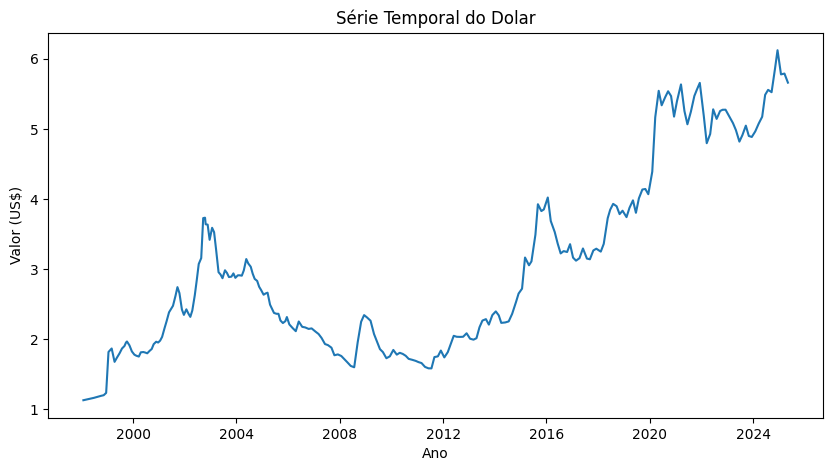

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['cotacao_dolar_mes_seguinte'])
plt.title('Série Temporal do Dolar')
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.show()

### IPCA

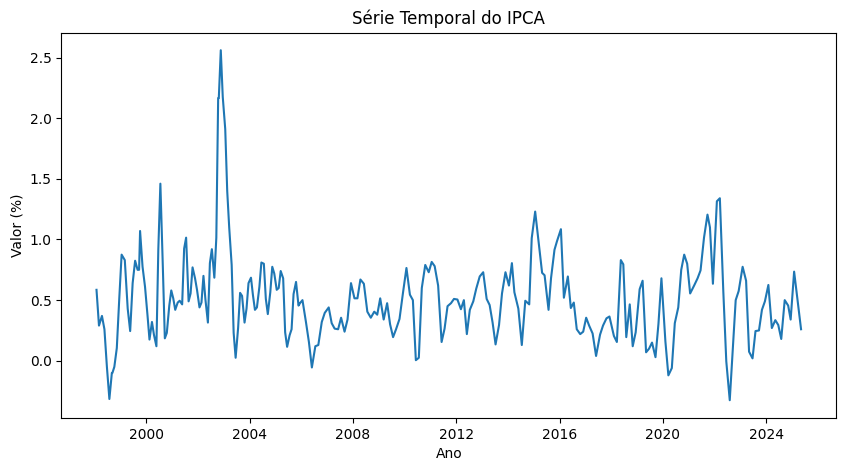

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['ipca_mes_seguinte'])
plt.title('Série Temporal do IPCA')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### Ibovespa

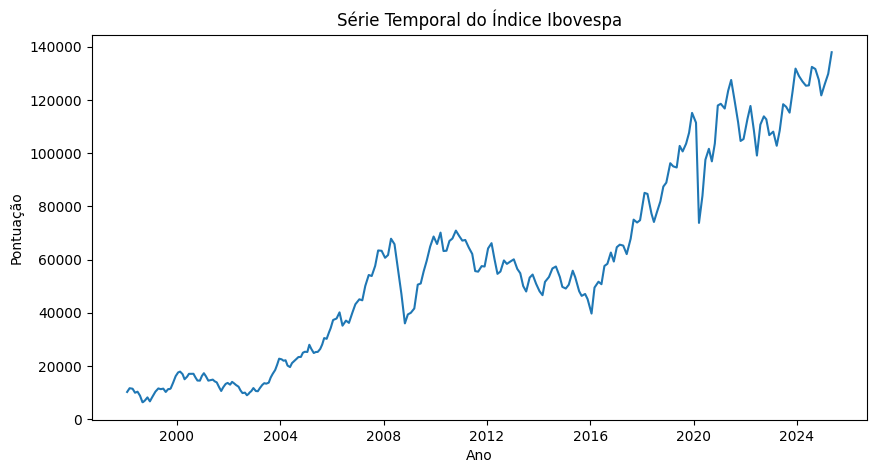

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['ibovespa_mes_seguinte'])
plt.title('Série Temporal do Índice Ibovespa')
plt.xlabel('Ano')
plt.ylabel('Pontuação')
plt.show()

### Desemprego

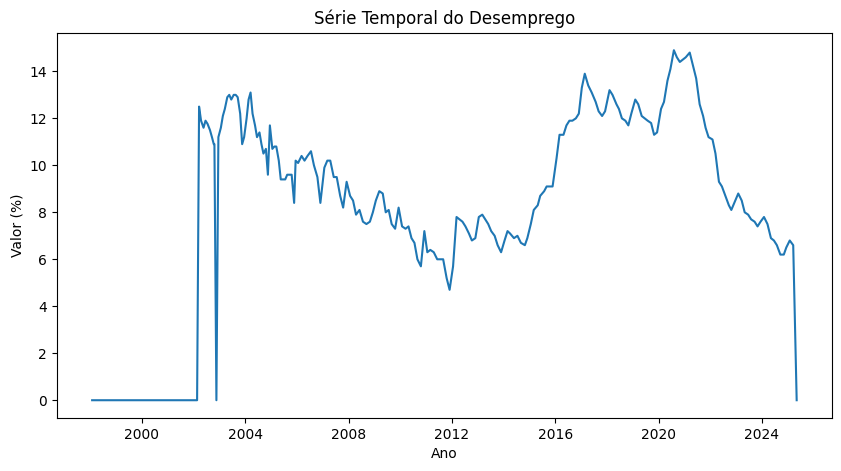

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['desemprego_mes_seguinte'])
plt.title('Série Temporal do Desemprego')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

# Correlação das variáveis com os sentimentos

In [84]:
dummies = pd.get_dummies(df["sentimento"]).astype(int)

df = pd.concat([df, dummies], axis=1)
df

n_reuniao       data                                              texto  \
0           21 1998-01-28  Em uma reunião do Comitê de Política Monetária...   
1           22 1998-03-04  O Comitê de Política Monetária (COPOM) da Repú...   
2           23 1998-04-15  O Comitê de Política Monetária (COPOM) decidiu...   
3           24 1998-05-20  O Comitê Monetário Nacional (COPOM) discute a ...   
4           25 1998-06-24  O Comitê de Política Monetária (COPOM) discuti...   
..         ...        ...                                                ...   
245        266 2024-11-06  A reunião do Comitê de Política Monetária (Cop...   
246        267 2024-12-11  A reunião do Conselho Monetário Nacional (Copo...   
247        268 2025-01-29  A reunião do Copom analisou a evolução recente...   
248        269 2025-03-19  A reunião do Copom (Comitê de Política Monetár...   
249        270 2025-05-07  O Comitê de Política Monetária (Copom) analiso...   

      sentimento   ano  trimestre  mes governo  selic_mes_seguinte  \
0    Preocupação  1998          1    1     FHC            0.117483   
1      Confiança  1998          1    3     FHC            0.097163   
2        Cautela  1998          2    4     FHC            0.083271   
3      Confiança  1998          2    5     FHC            0.076660   
4        Cautela  1998          2    6     FHC            0.074133   
..           ...   ...        ...  ...     ...                 ...   
245    Confiança  2024          4   11  Lula_3            0.041872   
246    Confiança  2024          4   12  Lula_3            0.045344   
247    Confiança  2025          1    1  Lula_3            0.048884   
248  Preocupação  2025          1    3  Lula_3            0.052372   
249    Confiança  2025          2    5  Lula_3            0.054191   

     ano_eleitoral  ...  selic_mes_anterior_am  cdi_mes_seguinte_am  \
0                0  ...               0.379291             0.340134   
1                0  ...               0.341375             0.275017   
2                0  ...               0.273951             0.231623   
3                0  ...               0.231336             0.212905   
4                0  ...               0.211953             0.203761   
..             ...  ...                    ...                  ...   
245              0  ...               0.106501             0.111260   
246              0  ...               0.111499             0.121021   
247              0  ...               0.121500             0.131062   
248              0  ...               0.131499             0.141044   
249              0  ...               0.141500             0.146282   

     cdi_mes_anterior_am  Acomodação  Alerta  Cautela  Confiança  Incerteza  \
0               0.377129           0       0        0          0          0   
1               0.335116           0       0        0          1          0   
2               0.272215           0       0        1          0          0   
3               0.231059           0       0        0          1          0   
4               0.211624           0       0        1          0          0   
..                   ...         ...     ...      ...        ...        ...   
245             0.106501           0       0        0          1          0   
246             0.111499           0       0        0          1          0   
247             0.121500           0       0        0          1          0   
248             0.131499           0       0        0          0          0   
249             0.141500           0       0        0          1          0   

     Otimismo  Preocupação  
0           0            1  
1           0            0  
2           0            0  
3           0            0  
4           0            0  
..        ...          ...  
245         0            0  
246         0            0  
247         0            0  
248         0            1  
249         0            0  

[250 rows x 34 columns]

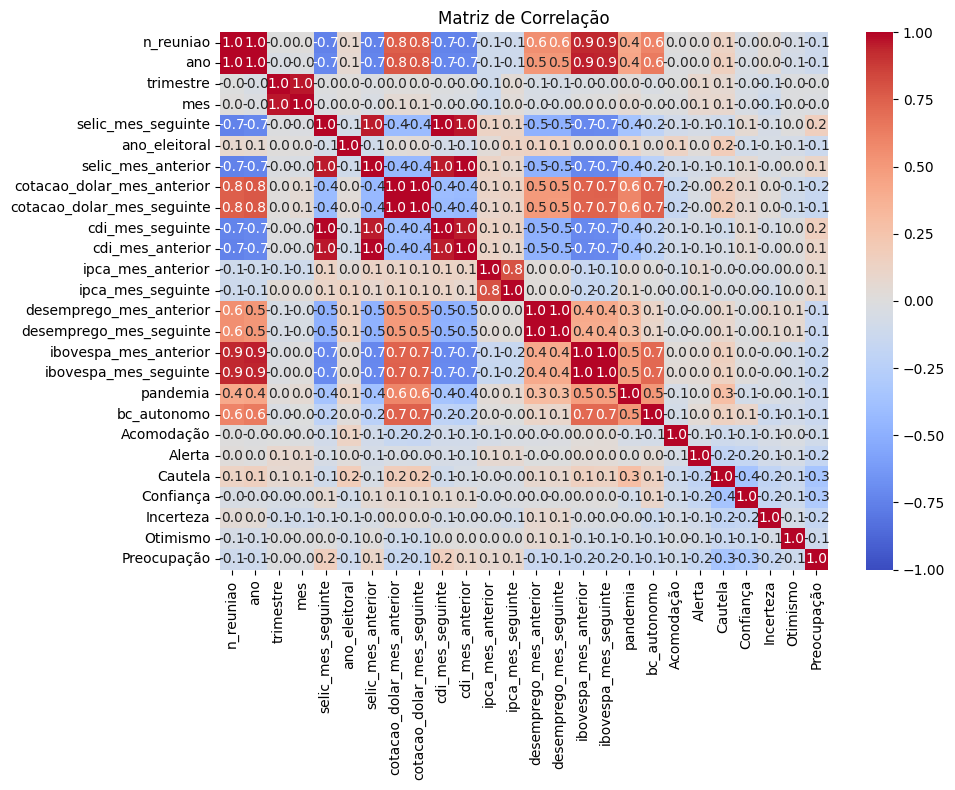

In [85]:
df_corr = df.drop(["selic_mes_seguinte_am", "selic_mes_anterior_am", "cdi_mes_seguinte_am", "cdi_mes_anterior_am"], axis=1).select_dtypes(include='number').corr()

# Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

# Evolução histórica do sentimento por presidente

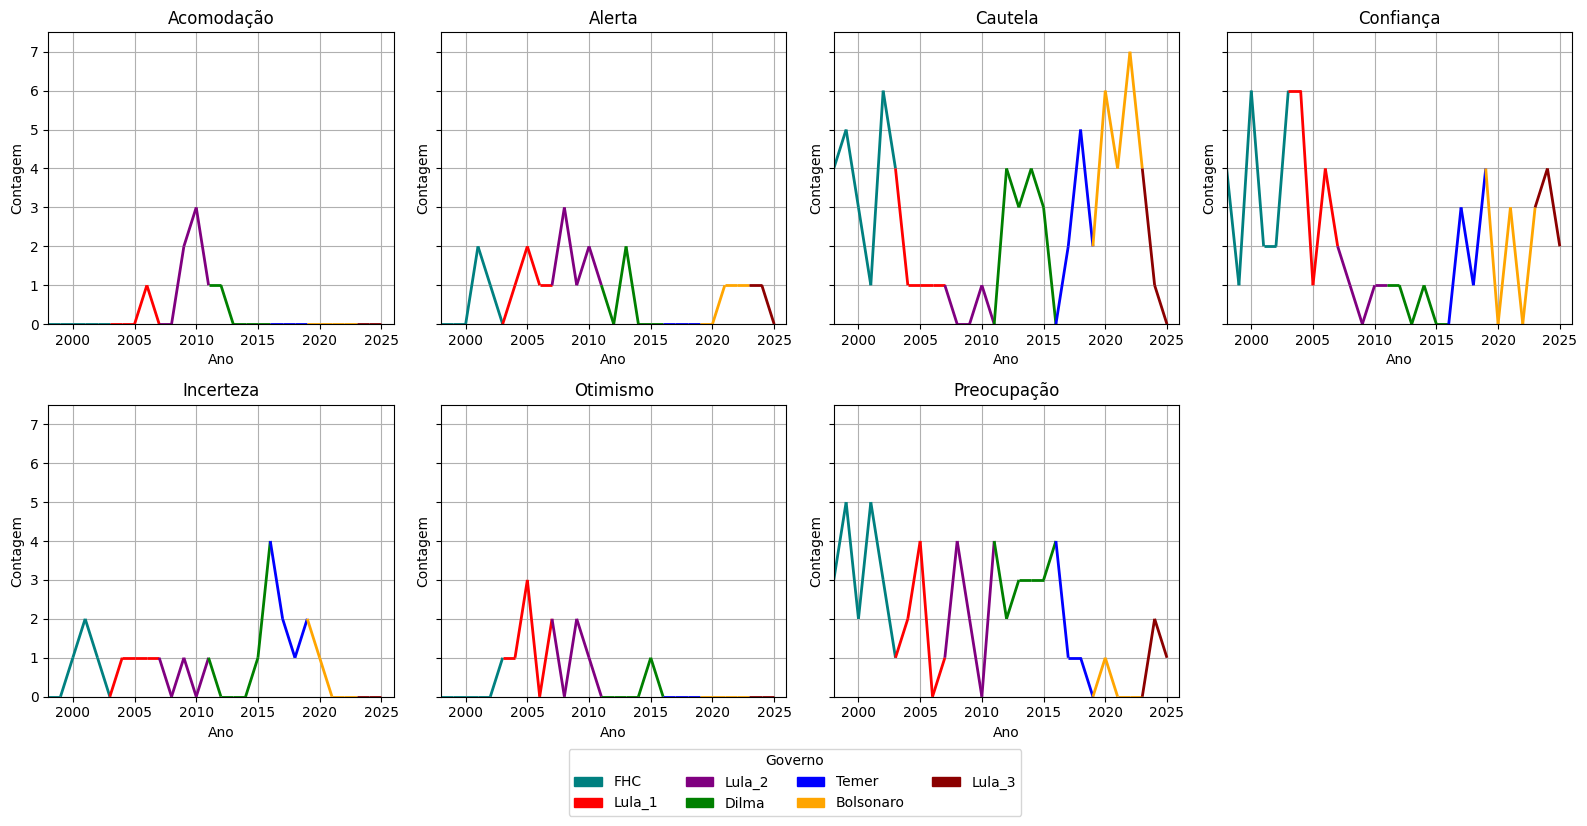

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches

sentimentos = df.groupby("ano")["sentimento"].value_counts().unstack().fillna(0)

# Dicionário presidente por ano
presidentes_por_ano = {
    1998: "FHC", 1999: "FHC", 2000: "FHC", 2001: "FHC", 2002: "FHC",
    2003: "Lula_1", 2004: "Lula_1", 2005: "Lula_1", 2006: "Lula_1", 2007: "Lula_2", 2008: "Lula_2", 2009: "Lula_2", 2010: "Lula_2",
    2011: "Dilma", 2012: "Dilma", 2013: "Dilma", 2014: "Dilma", 2015: "Dilma",
    2016: "Temer", 2017: "Temer", 2018: "Temer",
    2019: "Bolsonaro", 2020: "Bolsonaro", 2021: "Bolsonaro", 2022: "Bolsonaro",
    2023: "Lula_3", 2024: "Lula_3", 2025: "Lula_3"
}

# Cores por presidente
cores_map = {
    "FHC": "teal",
    "Lula_1": "red",
    "Lula_2": "purple",
    "Dilma": "green",
    "Temer": "blue",
    "Bolsonaro": "orange",
    "Lula_3": "darkred"
}

fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axs = axs.flatten()

for i, sentimento in enumerate(sentimentos.columns):
    ax = axs[i]
    x = np.array(sentimentos.index)
    y = sentimentos[sentimento].values

    # Mapear cores conforme presidente em cada ano
    colors = [cores_map[presidentes_por_ano.get(year, "Lula_2")] for year in x]

    # Criar segmentos para colorir
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, colors=colors[:-1], linewidth=2)
    ax.add_collection(lc)

    ax.autoscale()
    ax.set_xlim(x.min(), x.max()+1)
    ax.set_ylim(min(y)*0.9, max(y)*1.5)
    ax.set_title(sentimento)
    ax.set_xlabel("Ano")
    ax.set_ylabel("Contagem")
    ax.grid(True)

# Remove o último subplot (8º) vazio
if len(sentimentos.columns) < len(axs):
    for i in range(len(sentimentos.columns), len(axs)):
        fig.delaxes(axs[i])

# Legenda global
patches = [mpatches.Patch(color=c, label=p) for p, c in cores_map.items()]
fig.legend(handles=patches, title="Governo", loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.035))

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


In [87]:
df.groupby("sentimento")["governo"].value_counts()

sentimento   governo  
Acomodação   Lula_2        5
             Dilma         2
             Lula_1        1
Alerta       Lula_2        7
             Lula_1        4
             Dilma         3
             FHC           3
             Bolsonaro     2
             Lula_3        2
Cautela      Bolsonaro    19
             FHC          19
             Dilma        14
             Lula_1        7
             Temer         7
             Lula_3        5
             Lula_2        2
Confiança    Lula_1       17
             FHC          15
             Lula_3        9
             Bolsonaro     7
             Lula_2        4
             Temer         4
             Dilma         3
Incerteza    Dilma         5
             FHC           4
             Temer         4
             Bolsonaro     3
             Lula_1        3
             Lula_2        2
Otimismo     Lula_1        5
             Lula_2        5
             Dilma         1
Preocupação  FHC          18
             Dilma  

In [88]:
df.groupby("governo")["sentimento"].value_counts()

governo    sentimento 
Bolsonaro  Cautela        19
           Confiança       7
           Incerteza       3
           Alerta          2
           Preocupação     1
Dilma      Preocupação    17
           Cautela        14
           Incerteza       5
           Alerta          3
           Confiança       3
           Acomodação      2
           Otimismo        1
FHC        Cautela        19
           Preocupação    18
           Confiança      15
           Incerteza       4
           Alerta          3
Lula_1     Confiança      17
           Cautela         7
           Preocupação     7
           Otimismo        5
           Alerta          4
           Incerteza       3
           Acomodação      1
Lula_2     Alerta          7
           Preocupação     7
           Acomodação      5
           Otimismo        5
           Confiança       4
           Cautela         2
           Incerteza       2
Lula_3     Confiança       9
           Cautela         5
           Preocupaç

# Mediana dos indicadores por sentimento

In [89]:
cols_anterior = [c for c in df.columns if c.endswith("anterior")]

df.groupby("sentimento")[cols_anterior].median()

selic_mes_anterior  cotacao_dolar_mes_anterior  cdi_mes_anterior  \
sentimento                                                                      
Acomodação             0.040207                    1.794555          0.040130   
Alerta                 0.042065                    2.157191          0.041837   
Cautela                0.047279                    3.072865          0.047279   
Confiança              0.054367                    2.884996          0.054161   
Incerteza              0.052531                    3.121991          0.052461   
Otimismo               0.048272                    2.255718          0.048109   
Preocupação            0.052531                    2.324581          0.052461   

             ipca_mes_anterior  desemprego_mes_anterior  ibovespa_mes_anterior  
sentimento                                                                      
Acomodação               0.300                      6.6           62472.931818  
Alerta                   0.560                      7.6           61443.842105  
Cautela                  0.440                      8.7           55551.454545  
Confiança                0.435                      9.4           36960.608696  
Incerteza                0.420                     10.2           47096.714286  
Otimismo                 0.430                      9.6           44497.315789  
Preocupação              0.490                      7.7           47422.047619

# Mediana alterações indicadores após reuniões

In [90]:
df["diff_selic"] = df["selic_mes_seguinte"] - df["selic_mes_anterior"]
df["diff_dolar"] = df["cotacao_dolar_mes_seguinte"] - df["cotacao_dolar_mes_anterior"]
df["diff_cdi"] = df["cdi_mes_seguinte"] - df["cdi_mes_anterior"]
df["diff_ipca"] = df["ipca_mes_seguinte"] - df["ipca_mes_anterior"]
df["diff_desemprego"] = df["desemprego_mes_seguinte"] - df["desemprego_mes_anterior"]
df["diff_ibov"] = df["ibovespa_mes_seguinte"] - df["ibovespa_mes_anterior"]

df.groupby("sentimento")[["diff_selic", "diff_dolar", "diff_cdi", "diff_ipca", "diff_desemprego", "diff_ibov"]].median()

diff_selic  diff_dolar  diff_cdi  diff_ipca  diff_desemprego  \
sentimento                                                                  
Acomodação     0.000000   -0.037529 -0.000026      0.085             -0.1   
Alerta         0.000000    0.005208  0.000092     -0.045             -0.1   
Cautela        0.000000    0.016559  0.000000      0.020             -0.1   
Confiança     -0.000222    0.006472 -0.000177      0.030              0.0   
Incerteza     -0.000464    0.049045 -0.000190     -0.035              0.0   
Otimismo      -0.000841   -0.031573 -0.000840     -0.045              0.0   
Preocupação    0.000828    0.005225  0.000794      0.045              0.0   

               diff_ibov  
sentimento                
Acomodação   1424.314229  
Alerta        715.506266  
Cautela      -378.782609  
Confiança     935.571429  
Incerteza    -529.076555  
Otimismo      177.549407  
Preocupação   393.389610

# NLP

In [91]:
import spacy


nlp = spacy.load("pt_core_news_sm")


def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return " ".join(tokens)


full = pd.read_json("Data/dados_brutos.json")
full

c:\Users\User\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


n_reuniao        data                                              texto
0           21  1998-01-28  \n\n  \n<h3>Sumário</h3><a href="#_Toc37333813...
1           22  1998-03-04  \n  \n    <div class="h3">Sum&aacute;rio</div>...
2           23  1998-04-15  \n  \n    <div class="h3">Sum&aacute;rio</div>...
3           24  1998-05-20  \n  \n    <div class="h3">Sum&aacute;rio</div>...
4           25  1998-06-24  \n\n  \n    <p>&nbsp;</p>\n\n    <p><strong>Su...
..         ...         ...                                                ...
245        266  2024-11-06  <div id="atacompleta"><div id="ataconteudo"><h...
246        267  2024-12-11  <div id="atacompleta"><div id="ataconteudo"><h...
247        268  2025-01-29  <div id="atacompleta"><div id="ataconteudo"><h...
248        269  2025-03-19  <div id="atacompleta"><div id="ataconteudo"><h...
249        270  2025-05-07  <div id="atacompleta"><div id="ataconteudo"><h...

[250 rows x 3 columns]

In [95]:
full["texto"] = full["texto"].fillna(df["texto"])

full[full["texto"].isna()]

Empty DataFrame
Columns: [n_reuniao, data, texto]
Index: []

In [96]:
full['texto_processado'] = full["texto"].apply(spacy_preprocess)
full

n_reuniao        data                                              texto  \
0           21  1998-01-28  \n\n  \n<h3>Sumário</h3><a href="#_Toc37333813...   
1           22  1998-03-04  \n  \n    <div class="h3">Sum&aacute;rio</div>...   
2           23  1998-04-15  \n  \n    <div class="h3">Sum&aacute;rio</div>...   
3           24  1998-05-20  \n  \n    <div class="h3">Sum&aacute;rio</div>...   
4           25  1998-06-24  \n\n  \n    <p>&nbsp;</p>\n\n    <p><strong>Su...   
..         ...         ...                                                ...   
245        266  2024-11-06  <div id="atacompleta"><div id="ataconteudo"><h...   
246        267  2024-12-11  <div id="atacompleta"><div id="ataconteudo"><h...   
247        268  2025-01-29  <div id="atacompleta"><div id="ataconteudo"><h...   
248        269  2025-03-19  <div id="atacompleta"><div id="ataconteudo"><h...   
249        270  2025-05-07  <div id="atacompleta"><div id="ataconteudo"><h...   

                                      texto_processado  
0    monetário mercado monetário operação mercado p...  
1    div mercado reserva mercado reserva mercado me...  
2    div mercado reserva mercado reserva mercado me...  
3    div mercado mercado mercado mercado hr br br d...  
4    div div div div div mercado mercado div div me...  
..                                                 ...  
245  div atualização conjuntura econômico cenário c...  
246  div atualização conjuntura econômico cenário c...  
247  div atualização conjuntura econômico cenário c...  
248  div atualização conjuntura econômico cenário c...  
249  div atualização conjuntura econômico cenário c...  

[250 rows x 4 columns]

In [97]:
df["texto_processado"] = full["texto_processado"]

In [108]:
import re


words_to_remove = ['apresentar', 'ano', 'anterior', 'atingir', 'recente', 'ante', 'reunião', 'p', 'haver', 'li', 'respectivamente', 'observar', 'ser', 'considerar', 'período', 'div', 'strongr', 'janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro', 'trimestre']

pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

df['texto_processado'] = (
    df['texto_processado']
    .str.replace(pattern, '', flags=re.IGNORECASE, regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criar o vetorizador TF-IDF (máximo de 1000 palavras mais relevantes)
vectorizer = TfidfVectorizer(max_features=1000)

# Transformar os abstracts em uma matriz esparsa TF-IDF
X = vectorizer.fit_transform(df['texto_processado'])

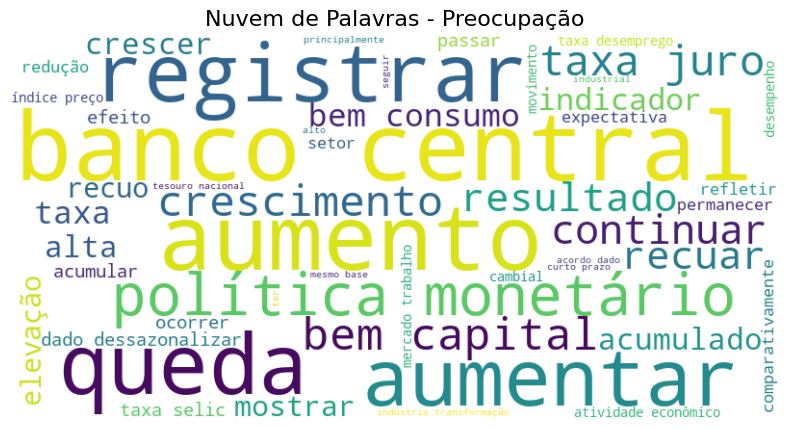

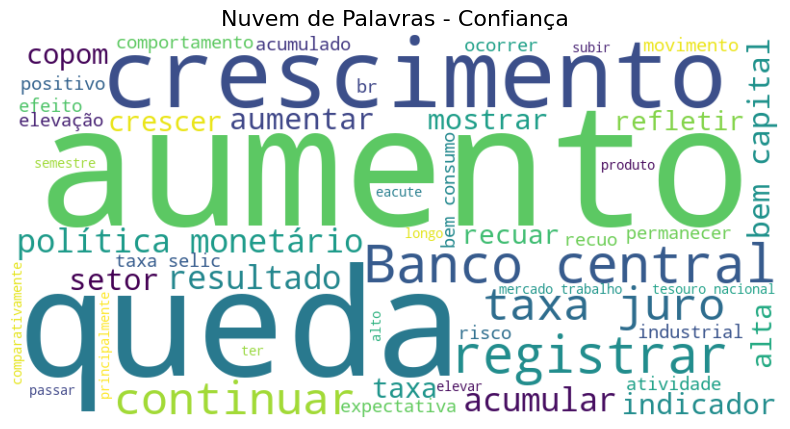

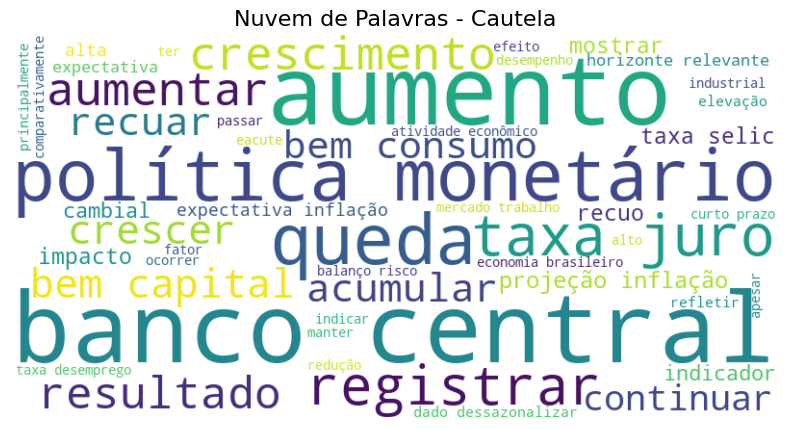

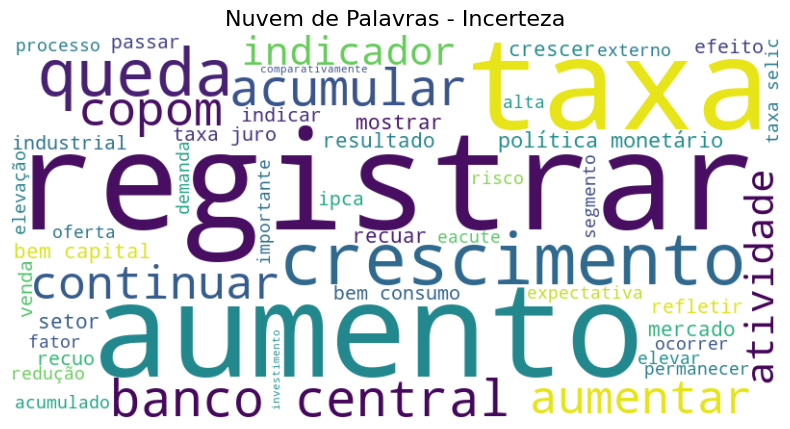

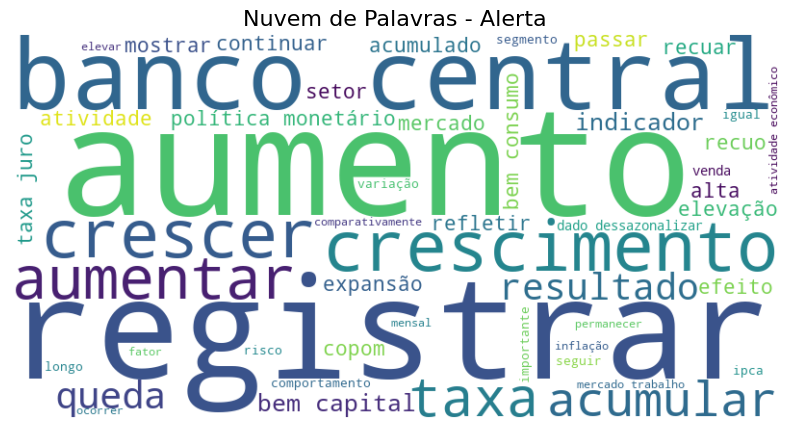

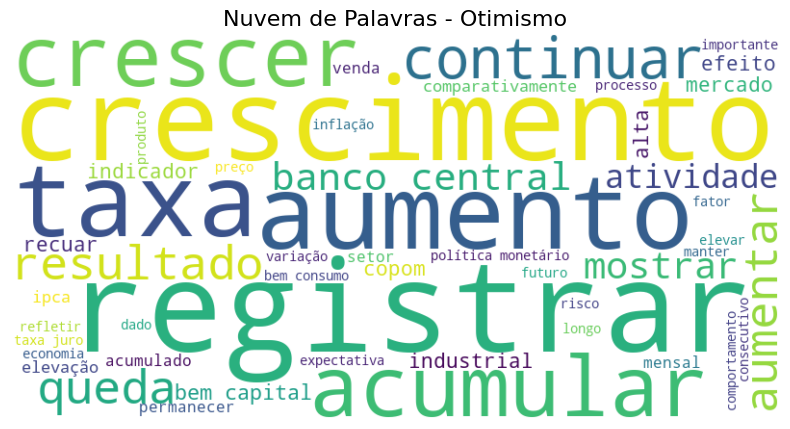

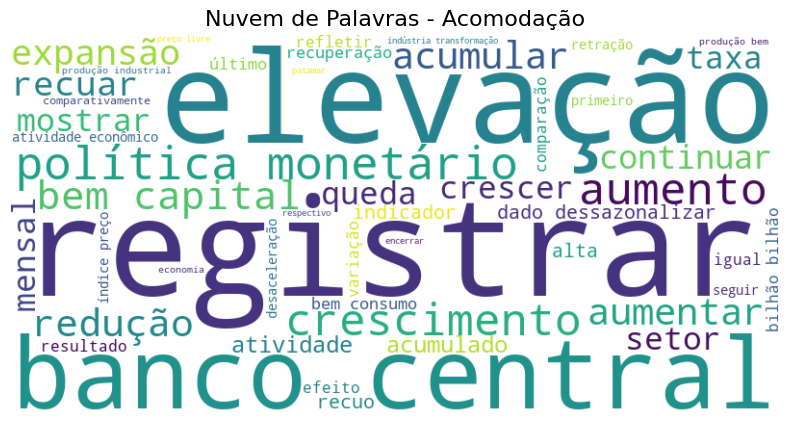

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Função para gerar a nuvem de palavras de um cluster específico
def gerar_nuvem(sentimento):
    textos = df[df['sentimento'] == sentimento]['texto_processado']
    texto_concatenado = " ".join(textos)

    wordcloud = WordCloud(max_words=50, width=800, height=400, background_color='white').generate(texto_concatenado)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Nuvem de Palavras - {sentimento}', fontsize=16)
    plt.show()

# Gerar nuvem para cada cluster
for i in df['sentimento'].unique():
    gerar_nuvem(i)

In [106]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def grafo_palavras_centradas(sentimento, top_n=30, peso_minimo=2, top_central=10):
    textos = df[df['sentimento'] == sentimento]['texto_processado']

    # Vetorização
    vectorizer = CountVectorizer(max_features=top_n, stop_words='english')
    X_counts = vectorizer.fit_transform(textos)
    vocab = vectorizer.get_feature_names_out()
    cooc_matrix = (X_counts.T @ X_counts).toarray()

    # Construir grafo completo
    G = nx.Graph()
    for i in range(len(vocab)):
        for j in range(i + 1, len(vocab)):
            weight = cooc_matrix[i][j]
            if weight >= peso_minimo:
                G.add_edge(vocab[i], vocab[j], weight=weight)

    # Calcular centralidade de grau (quantas conexões uma palavra tem)
    centralidade = nx.degree_centrality(G)

    # Selecionar apenas as palavras mais centrais
    palavras_mais_centradas = sorted(centralidade.items(), key=lambda x: x[1], reverse=True)[:top_central]
    palavras_nucleares = [p[0] for p in palavras_mais_centradas]

    # Criar subgrafo apenas com essas palavras
    subgrafo = G.subgraph(palavras_nucleares)

    # Visualização do subgrafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(subgrafo, k=0.6, seed=42)

    # Destacar os nós mais centrais
    central_values = [centralidade[n] for n in subgrafo.nodes()]
    nx.draw_networkx_nodes(subgrafo, pos, node_color='lightgreen', node_size=[v * 3000 for v in central_values])
    nx.draw_networkx_edges(subgrafo, pos, width=1.5, alpha=0.5)
    nx.draw_networkx_labels(subgrafo, pos, font_size=12, font_weight='bold')

    plt.title(f"Grafo de {sentimento}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

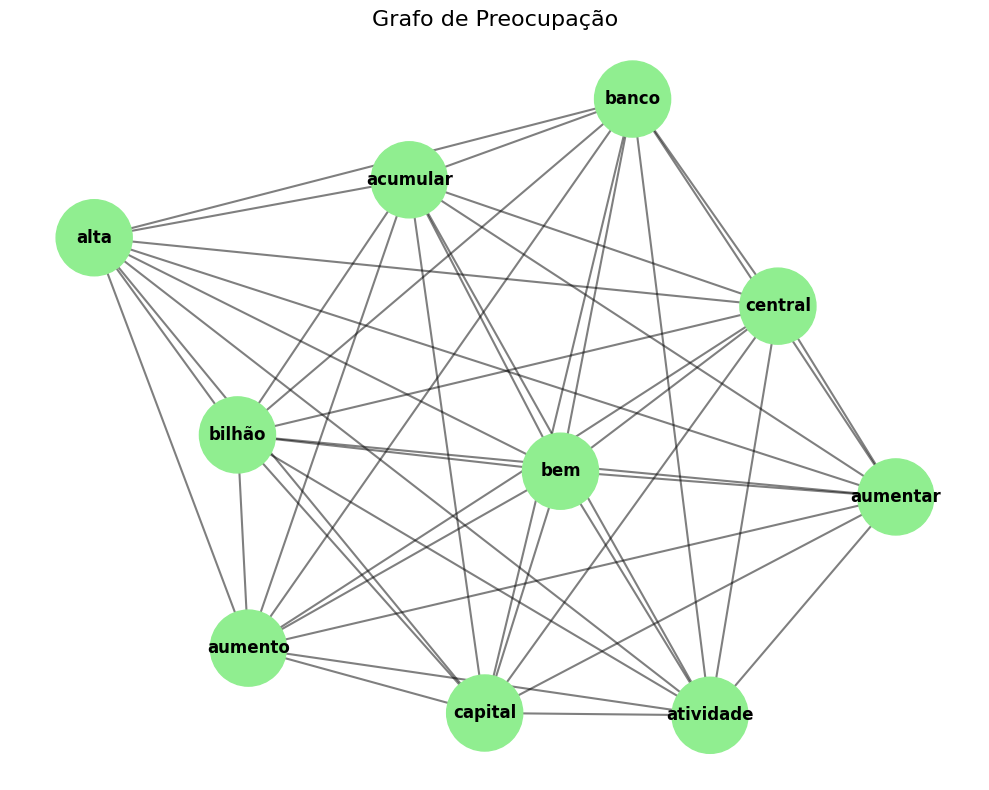

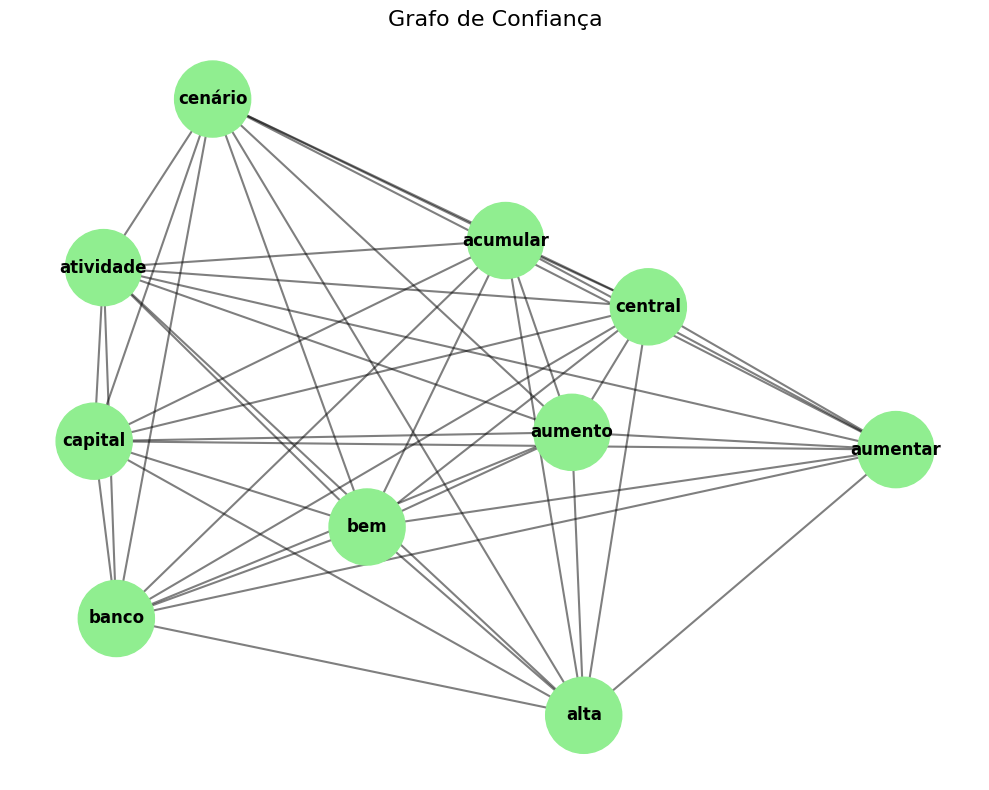

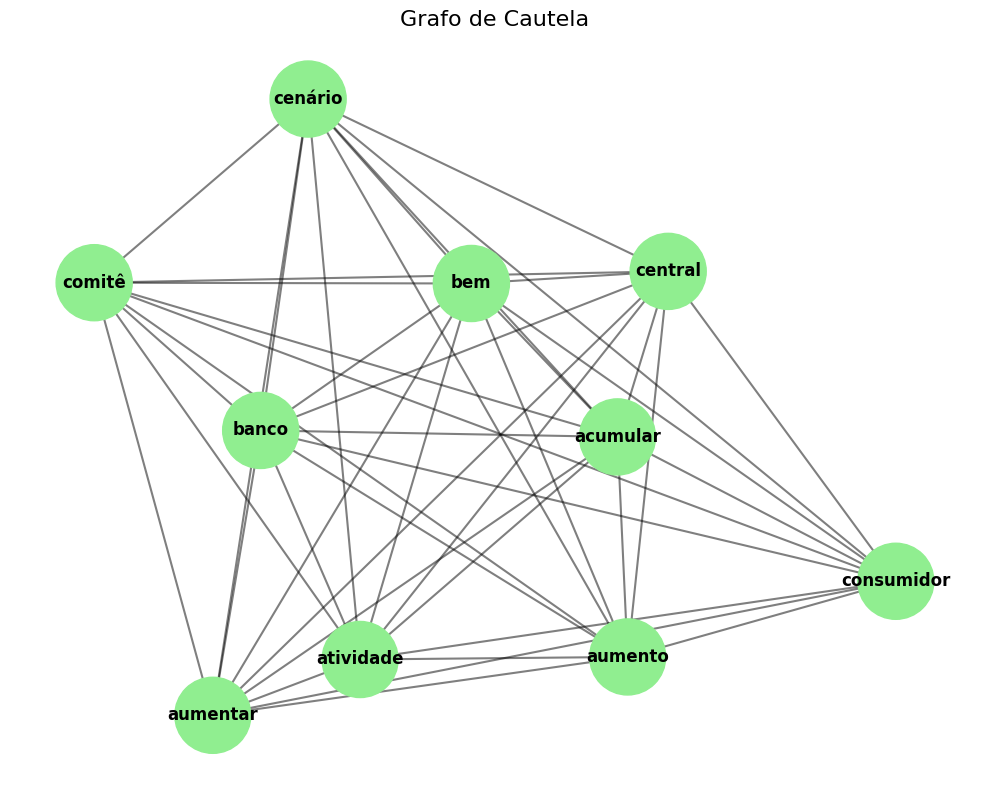

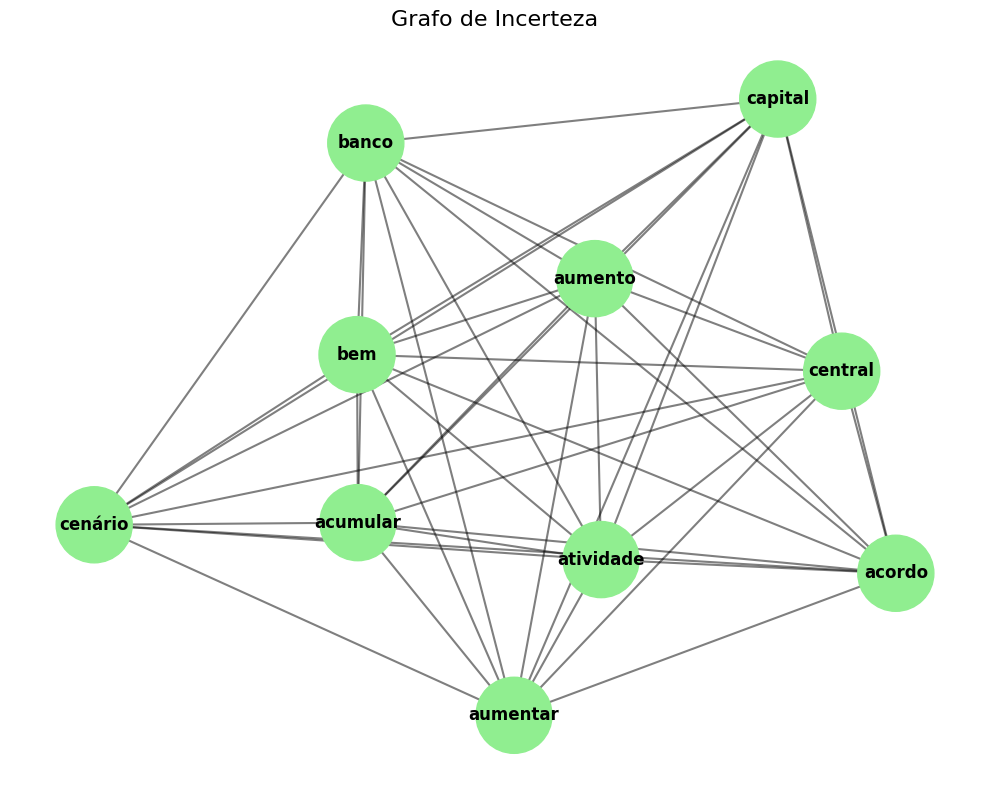

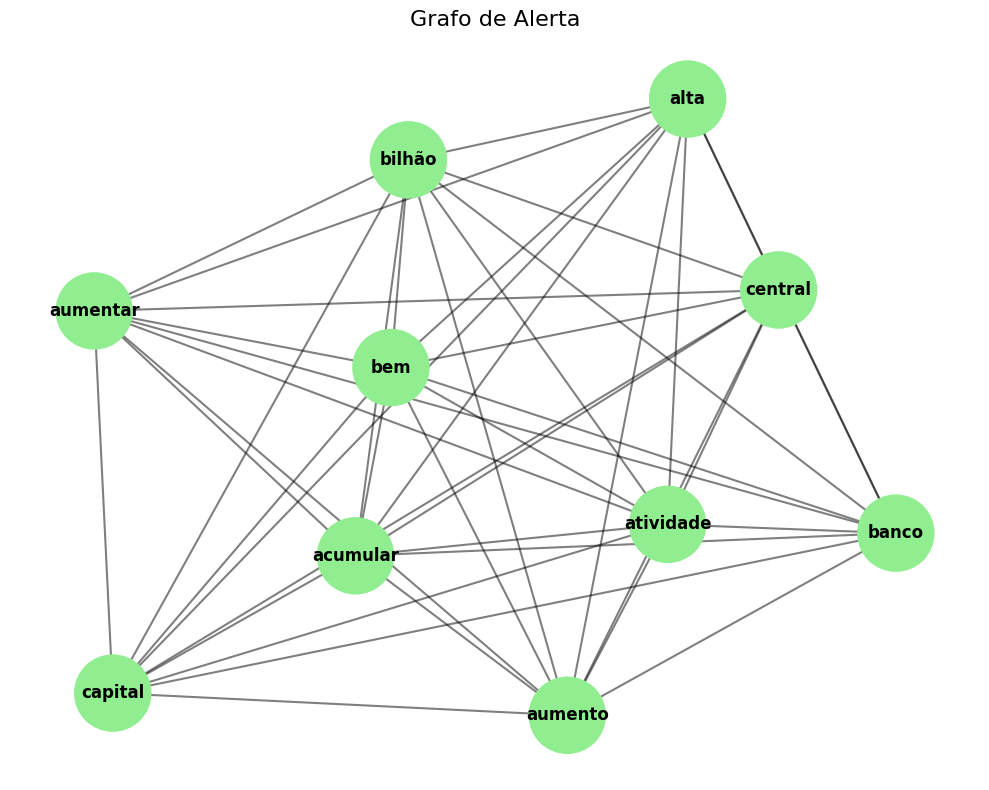

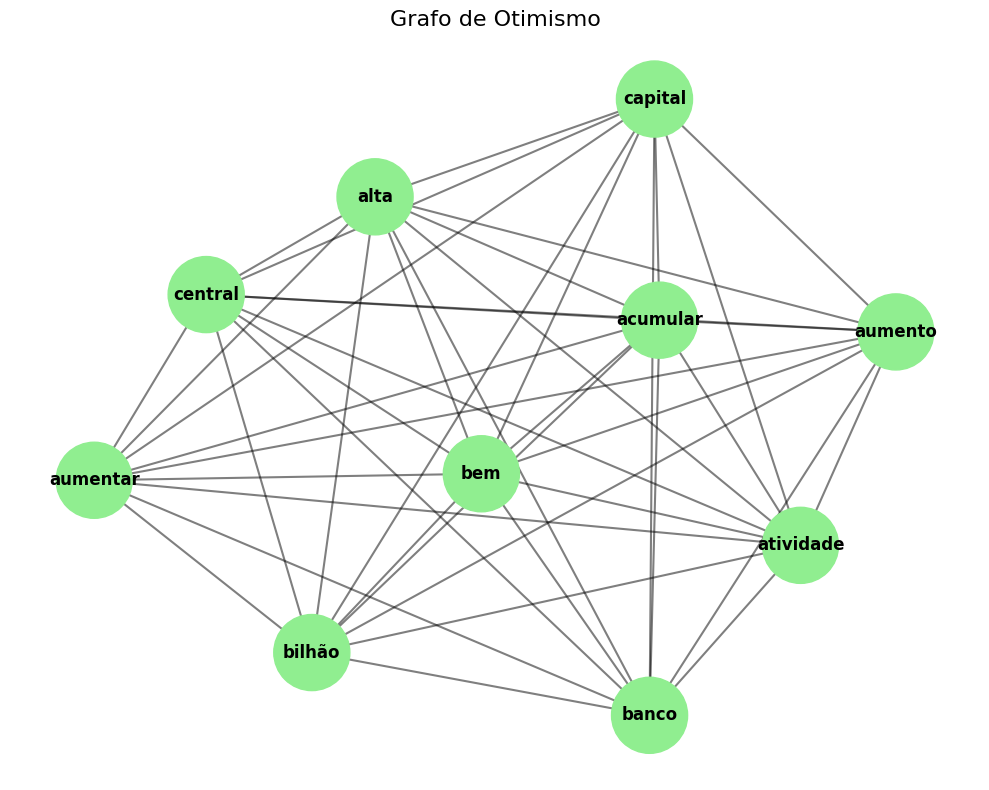

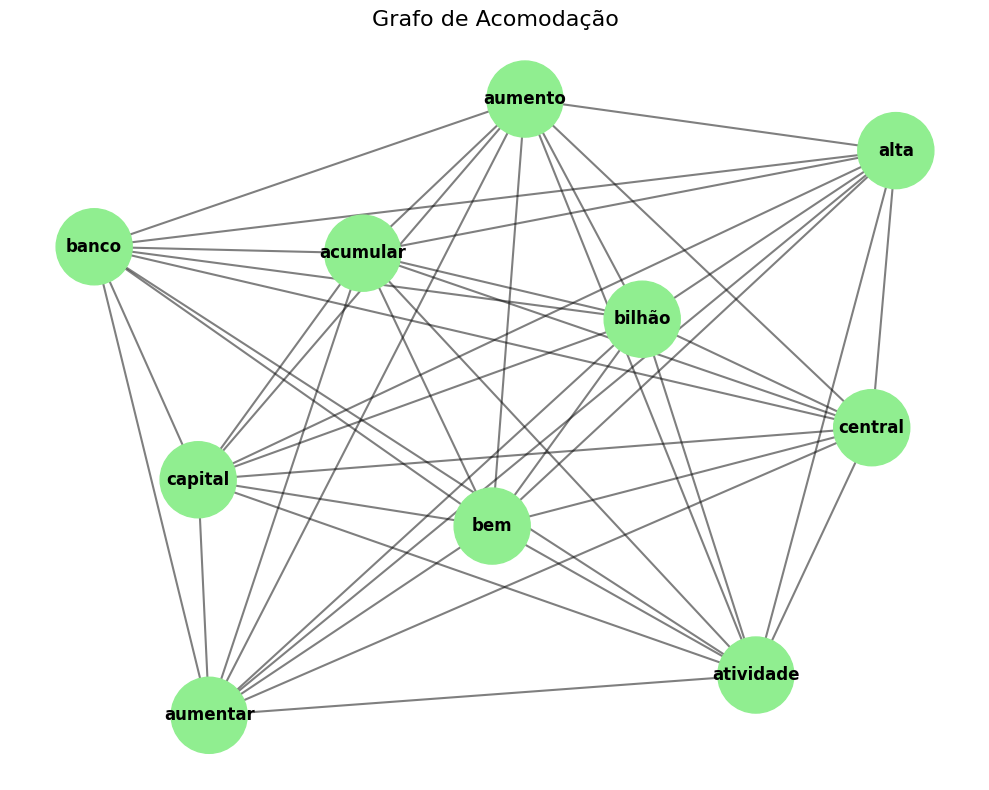

In [111]:
for sentimento in df["sentimento"].unique():
    grafo_palavras_centradas(sentimento=sentimento, top_n=50, peso_minimo=2, top_central=10)